### Time series Analysis 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Reading csv file

In [2]:
import pandas as pd
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### Missing values in dataframe

In [4]:
df.columns=['Month','nPass']

In [5]:
df.head()

,Month,nPass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.isna().sum()

Month    0
nPass    0
dtype: int64

### If any missing values present apply interpolation

In [7]:
df['nPass']=df['nPass'].interpolate()

In [8]:
df.head()

,Month,nPass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Convert month to datetime

In [9]:
df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,nPass
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
df.dtypes

Month    datetime64[ns]
nPass             int64
dtype: object

### Keep row index as month

In [11]:
df.index=df['Month']

In [12]:
df.head()

,Month,nPass
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [13]:
df.drop(columns=['Month'])


,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### Visualize time series data

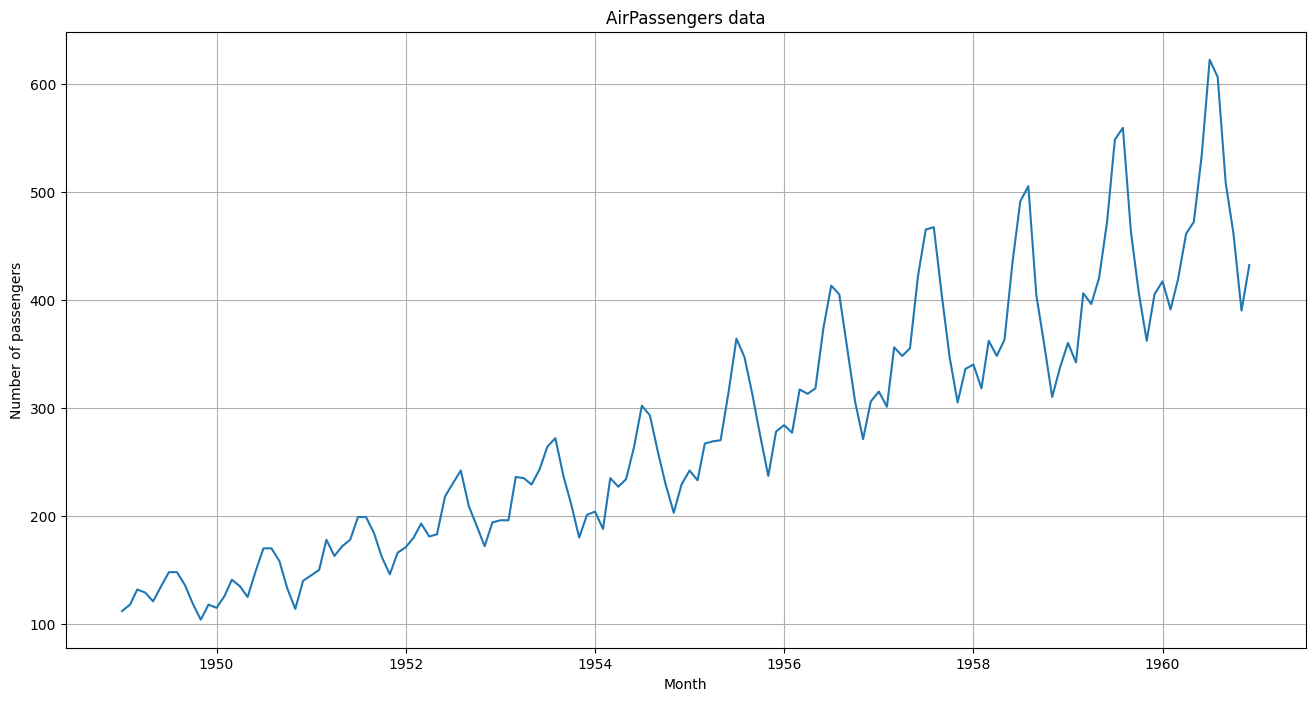

In [14]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,8))
plt.plot(df['nPass'])
plt.xlabel('Month')
plt.ylabel('Number of passengers')
plt.title('AirPassengers data')
plt.grid()
plt.show()

### Perform time series decomposition

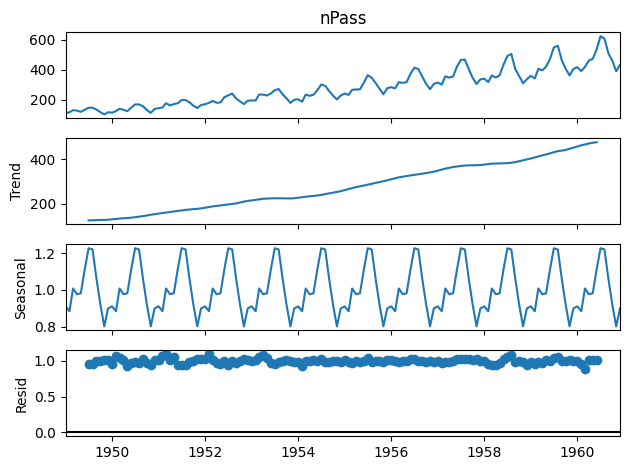

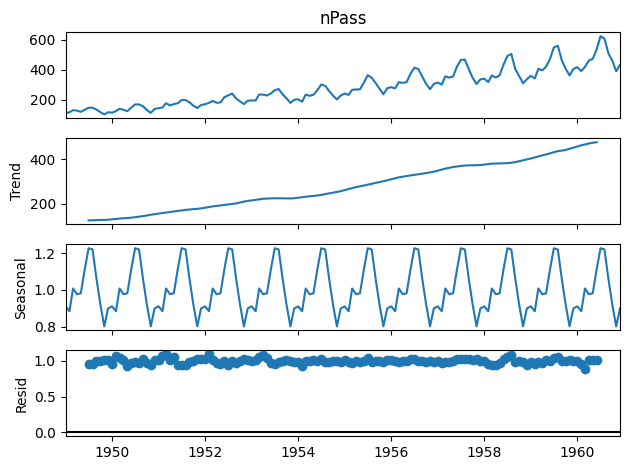

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q=seasonal_decompose(df['nPass'],model='mulplicative')
Q.plot()

### Trend graph with observed details

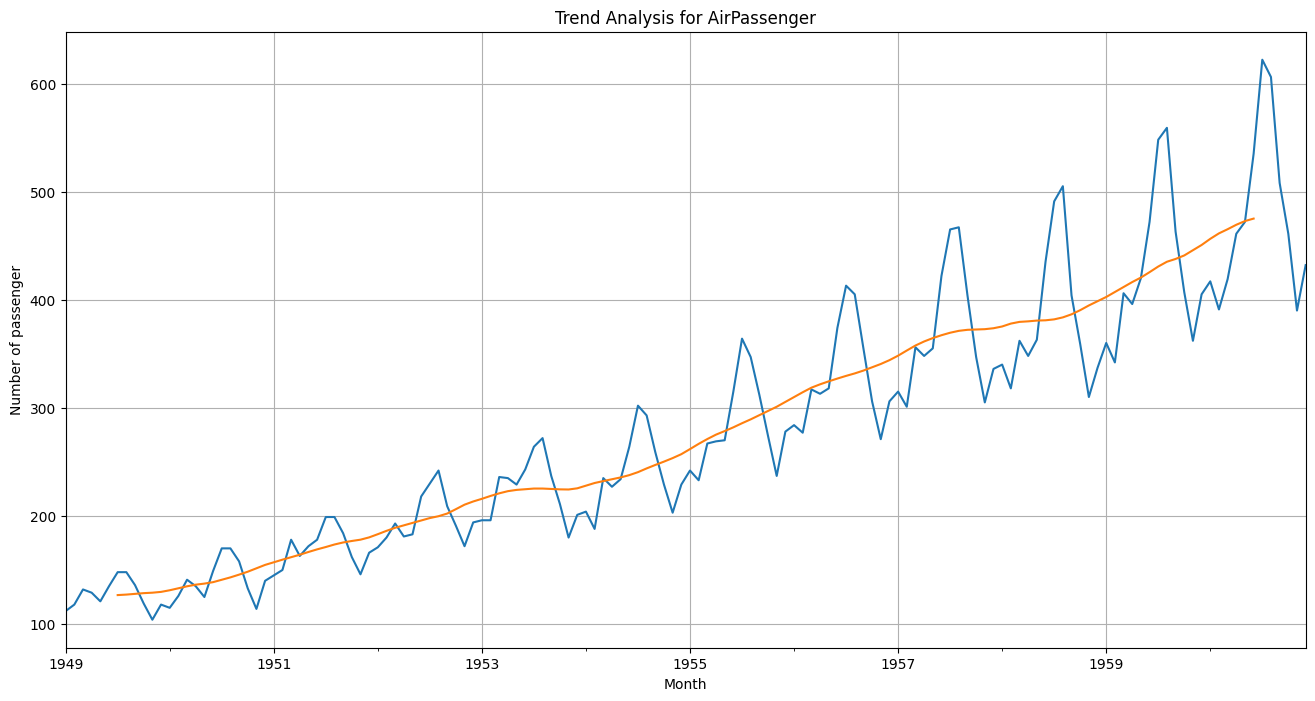

In [16]:
plt.figure(figsize=(16,8))
Q.observed.plot()
Q.trend.plot()
plt.xlabel('Month')
plt.ylabel('Number of passenger')
plt.title('Trend Analysis for AirPassenger')
plt.grid()
plt.show()

### Seasonlity plot

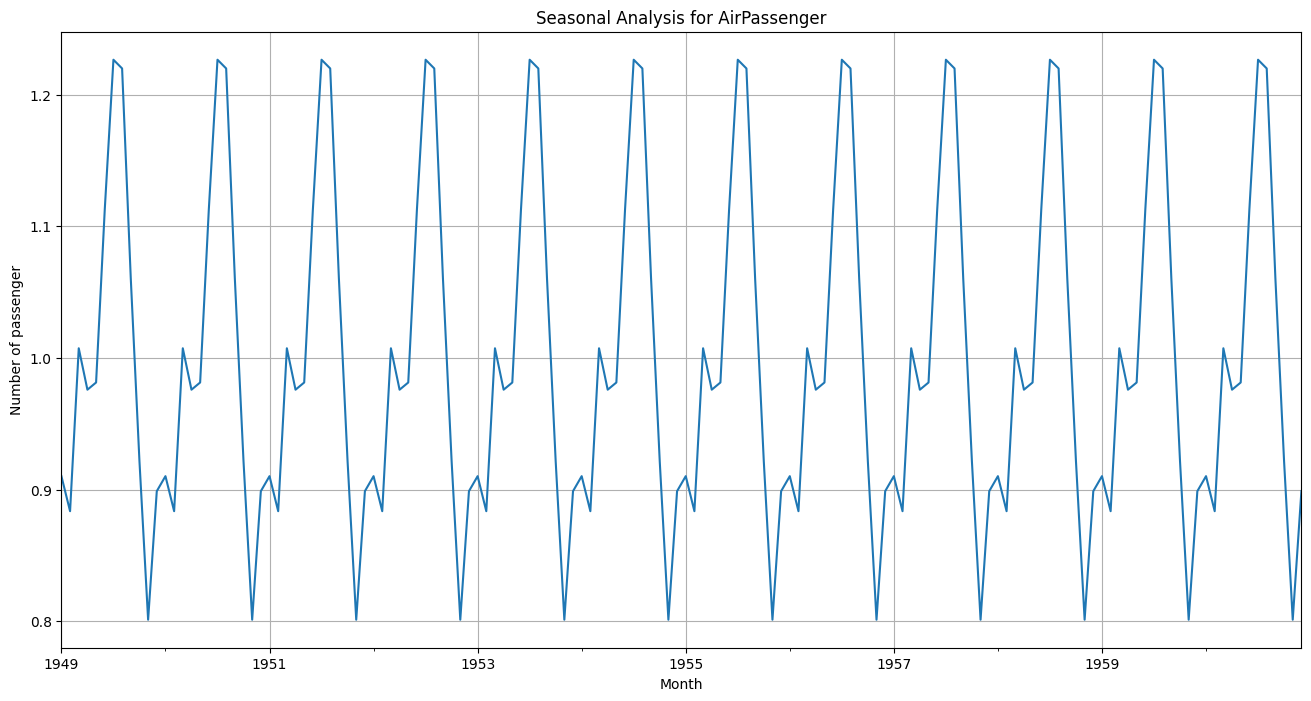

In [17]:
plt.figure(figsize=(16,8))
Q.seasonal.plot()
plt.xlabel('Month')
plt.ylabel('Number of passenger')
plt.title('Seasonal Analysis for AirPassenger')
plt.grid()
plt.show()

### Random /Residual plot


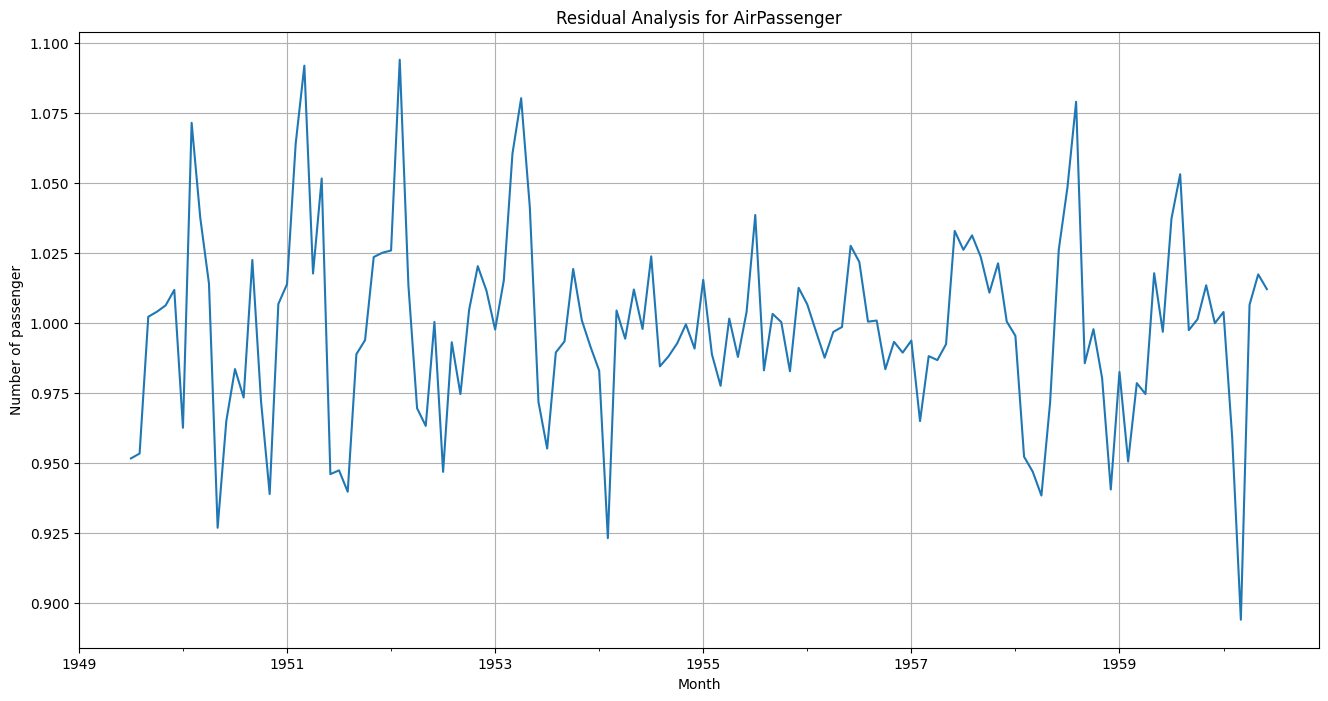

In [18]:
plt.figure(figsize=(16,8))
Q.resid.plot()
plt.xlabel('Month')
plt.ylabel('Number of passenger')
plt.title('Residual Analysis for AirPassenger')
plt.grid()
plt.show()

### Time Series forecasting

#### Install pmdarima package

In [19]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from pmdarima.arima import auto_arima

In [22]:
model=auto_arima(df['nPass'],m=12)


In [23]:
model.order

(2, 1, 1)

In [24]:
p=model.order[0]
d=model.order[1]
q=model.order[2]

In [25]:
p

2

In [26]:
d

1

In [27]:
q

1

### Forecast data for next 3 year
3 year =36 months

In [28]:
forecast,conf_int=model.predict(n_periods=36,return_conf_int=True)

In [29]:
forecast

1961-01-01    445.634991
1961-02-01    420.395103
1961-03-01    449.198451
1961-04-01    491.840095
1961-05-01    503.394633
1961-06-01    566.862610
1961-07-01    654.260334
1961-08-01    638.597642
1961-09-01    540.883890
1961-10-01    494.126763
1961-11-01    423.332843
1961-12-01    465.507703
1962-01-01    479.291063
1962-02-01    454.177067
1962-03-01    483.087234
1962-04-01    525.819514
1962-05-01    537.450958
1962-06-01    600.984190
1962-07-01    688.437283
1962-08-01    672.821572
1962-09-01    575.147683
1962-10-01    528.424380
1962-11-01    457.659160
1962-12-01    499.858372
1963-01-01    513.662395
1963-02-01    488.565931
1963-03-01    517.490975
1963-04-01    560.235877
1963-05-01    571.878032
1963-06-01    635.420351
1963-07-01    722.881156
1963-08-01    707.271987
1963-09-01    609.603650
1963-10-01    562.885057
1963-11-01    492.123834
1963-12-01    534.326437
Freq: MS, dtype: float64

In [31]:
forecast=forecast.apply(round)
forecast

1961-01-01    446
1961-02-01    420
1961-03-01    449
1961-04-01    492
1961-05-01    503
1961-06-01    567
1961-07-01    654
1961-08-01    639
1961-09-01    541
1961-10-01    494
1961-11-01    423
1961-12-01    466
1962-01-01    479
1962-02-01    454
1962-03-01    483
1962-04-01    526
1962-05-01    537
1962-06-01    601
1962-07-01    688
1962-08-01    673
1962-09-01    575
1962-10-01    528
1962-11-01    458
1962-12-01    500
1963-01-01    514
1963-02-01    489
1963-03-01    517
1963-04-01    560
1963-05-01    572
1963-06-01    635
1963-07-01    723
1963-08-01    707
1963-09-01    610
1963-10-01    563
1963-11-01    492
1963-12-01    534
Freq: MS, dtype: int64

In [30]:
conf_int

array([[423.34487759, 467.92510471],
       [394.23551428, 446.55469252],
       [419.83188992, 478.56501199],
       [460.37649263, 523.3036964 ],
       [470.38073086, 536.40853522],
       [532.6996341 , 601.02558583],
       [619.22147403, 689.2991947 ],
       [602.88020044, 674.31508414],
       [504.63159492, 577.13618588],
       [457.44624137, 530.80728383],
       [386.30414338, 460.361543  ],
       [428.19161369, 502.82379164],
       [433.49782381, 525.08430198],
       [405.10923684, 503.2448968 ],
       [431.15603588, 535.01843199],
       [471.84098531, 579.79804326],
       [481.87404375, 593.02787316],
       [544.15707729, 657.81130293],
       [630.60926527, 746.26530151],
       [614.17967749, 731.46346653],
       [515.83290928, 634.46245755],
       [468.5446067 , 588.30415285],
       [397.29775817, 518.02056239],
       [439.08041924, 560.63632426],
       [446.32772851, 580.99706096],
       [418.31885906, 558.81300308],
       [444.62493726, 590.35701177],
 

### Get lower and upper confidence bound

In [34]:
lower=conf_int[:,0]
upper=conf_int[:,1]

In [33]:
lower

array([423.34487759, 394.23551428, 419.83188992, 460.37649263,
       470.38073086, 532.6996341 , 619.22147403, 602.88020044,
       504.63159492, 457.44624137, 386.30414338, 428.19161369,
       433.49782381, 405.10923684, 431.15603588, 471.84098531,
       481.87404375, 544.15707729, 630.60926527, 614.17967749,
       515.83290928, 468.5446067 , 397.29775817, 439.08041924,
       446.32772851, 418.31885906, 444.62493726, 485.40258719,
       495.45124969, 557.69975588, 644.08749446, 627.57500073,
       529.13421157, 481.7453998 , 410.39451382, 452.0714933 ])

In [35]:
upper

array([467.92510471, 446.55469252, 478.56501199, 523.3036964 ,
       536.40853522, 601.02558583, 689.2991947 , 674.31508414,
       577.13618588, 530.80728383, 460.361543  , 502.82379164,
       525.08430198, 503.2448968 , 535.01843199, 579.79804326,
       593.02787316, 657.81130293, 746.26530151, 731.46346653,
       634.46245755, 588.30415285, 518.02056239, 560.63632426,
       580.99706096, 558.81300308, 590.35701177, 635.06916778,
       648.30481429, 713.14094693, 801.6748169 , 786.9689735 ,
       690.07308868, 644.02471427, 573.8531551 , 616.58138136])

In [37]:
lower=pd.Series(lower)
lower.index=forecast.index
lower=lower.apply(round)
lower

1961-01-01    423
1961-02-01    394
1961-03-01    420
1961-04-01    460
1961-05-01    470
1961-06-01    533
1961-07-01    619
1961-08-01    603
1961-09-01    505
1961-10-01    457
1961-11-01    386
1961-12-01    428
1962-01-01    433
1962-02-01    405
1962-03-01    431
1962-04-01    472
1962-05-01    482
1962-06-01    544
1962-07-01    631
1962-08-01    614
1962-09-01    516
1962-10-01    469
1962-11-01    397
1962-12-01    439
1963-01-01    446
1963-02-01    418
1963-03-01    445
1963-04-01    485
1963-05-01    495
1963-06-01    558
1963-07-01    644
1963-08-01    628
1963-09-01    529
1963-10-01    482
1963-11-01    410
1963-12-01    452
Freq: MS, dtype: int64

In [38]:
upper=pd.Series(upper)
upper.index=forecast.index
upper=upper.apply(round)
upper

1961-01-01    468
1961-02-01    447
1961-03-01    479
1961-04-01    523
1961-05-01    536
1961-06-01    601
1961-07-01    689
1961-08-01    674
1961-09-01    577
1961-10-01    531
1961-11-01    460
1961-12-01    503
1962-01-01    525
1962-02-01    503
1962-03-01    535
1962-04-01    580
1962-05-01    593
1962-06-01    658
1962-07-01    746
1962-08-01    731
1962-09-01    634
1962-10-01    588
1962-11-01    518
1962-12-01    561
1963-01-01    581
1963-02-01    559
1963-03-01    590
1963-04-01    635
1963-05-01    648
1963-06-01    713
1963-07-01    802
1963-08-01    787
1963-09-01    690
1963-10-01    644
1963-11-01    574
1963-12-01    617
Freq: MS, dtype: int64

#### PLotting forescast sheet

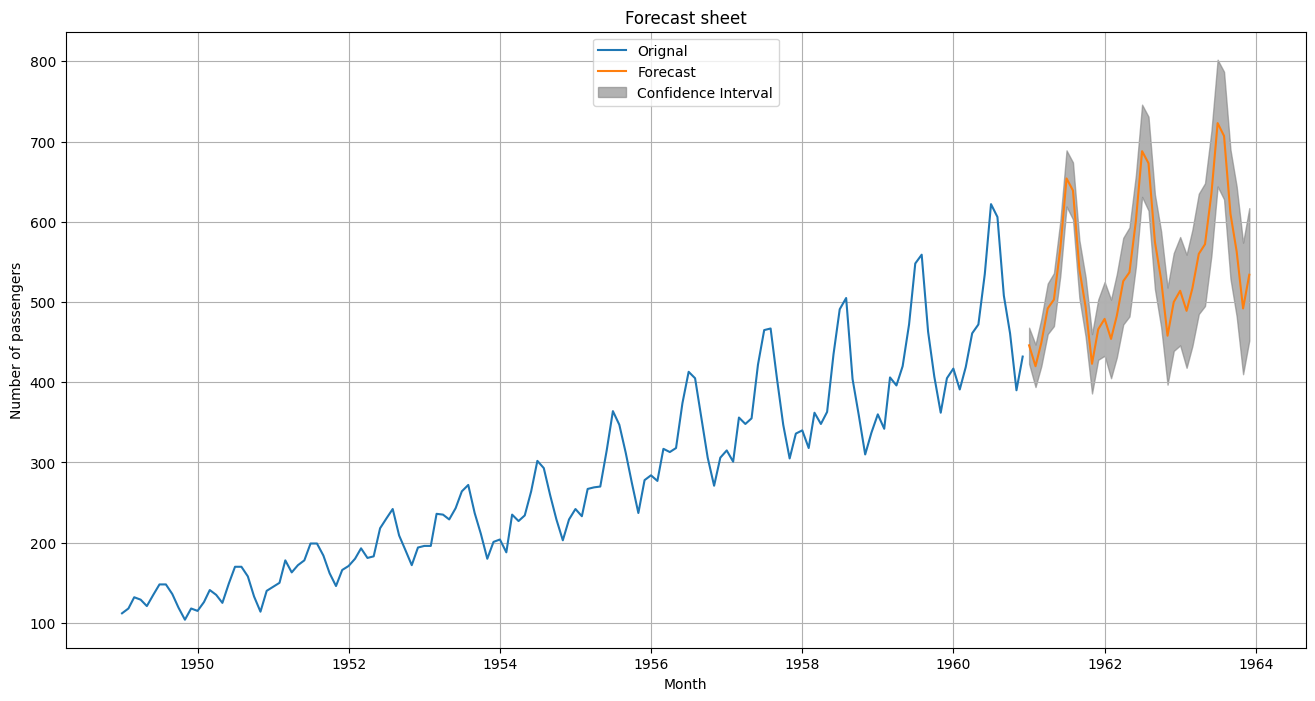

In [41]:
plt.figure(figsize=(16,8))
plt.plot(df['nPass'],label='Orignal')
plt.plot(forecast,label='Forecast')
plt.fill_between(forecast.index,lower,upper,color='gray',alpha=0.6,label='Confidence Interval')
plt.xlabel('Month')
plt.ylabel('Number of passengers')
plt.title('Forecast sheet')
plt.grid()
plt.legend(loc='upper center')
plt.show()


### Savwe above in forecast dataframe

In [51]:
df_forecast1=forecast.to_frame()
df_forecast1.columns=['Forecast']

In [52]:
df_forecast1

,Forecast
1961-01-01,446
1961-02-01,420
1961-03-01,449
1961-04-01,492
1961-05-01,503
1961-06-01,567
1961-07-01,654
1961-08-01,639
1961-09-01,541
1961-10-01,494


In [53]:
df_forecast1['Lower']=lower
df_forecast1['Upper']=upper

In [54]:
df_forecast1

,Forecast,Lower,Upper
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


### Save above to csv

In [55]:
df_forecast1.to_csv('Forecast.csv')